<a href="https://colab.research.google.com/github/Huyvubk/Math/blob/main/Singular_Value_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Viết function sử dụng Singular Value Decomposition để nén một ảnh màu với k components.

- Input: ảnh màu, k số lượng components muốn giữ lại 
- Output: ảnh sau khi nén


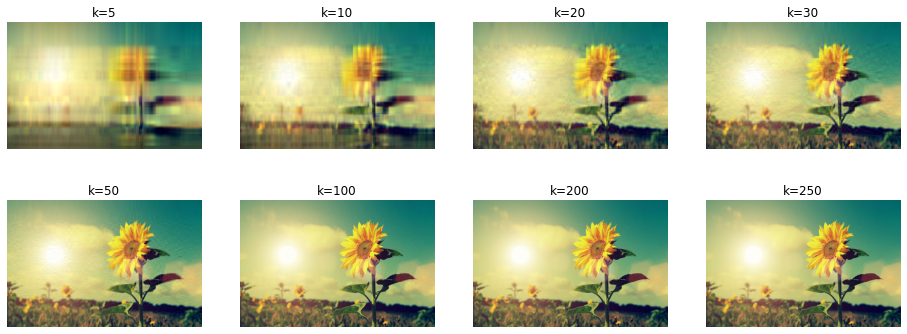

**Step1:** Biến đổi ảnh (ma trận 3 dim) thành ma trận 2 dim 

**Step2:** Tìm 3 thành phần $\mathbf{U}, \mathbf{\Sigma}, \mathbf{V}$ của ma trận vừa biến đổi ở step1

**Step3:** Chọn k component muốn giữ lại và nhân các thành phần $\mathbf{U}, \mathbf{\Sigma}, \mathbf{V^T}$ để lấy được kết quả ảnh sau khi nén 

**Step4::** Clip kết quả từ 0-255 và trả về shape ảnh ban đầu 

In [ ]:
!gdown --id 1fPWPrgXxDaxPsOie25IKfsQWqzL7HaIX

Downloading...
From: https://drive.google.com/uc?id=1fPWPrgXxDaxPsOie25IKfsQWqzL7HaIX
To: /content/sun.jpg
100% 45.6k/45.6k [00:00<00:00, 46.9MB/s]


In [ ]:
import cv2
import numpy as np

img_path = '/content/sun.jpg'

def compress_image(img_path, k):
    image = cv2.imread(img_path)
    h,w = image.shape[:2]
    # vì là ảnh màu có 3 dim nên cần chuyển đổi ma trận 3Dim sang 2 Dim (h, w*c) 
    matrix_2dim = np.reshape(image, (h, -1)) # (h, w*c)
    # k 

    # Singular Value Decompostion 
    U, s, Vt = np.linalg.svd(matrix_2dim, full_matrices = True)
   
    S = np.diag(s)
    # nén ảnh với k components 
    new_image = U[:, :k] @ S[: k, :k] @ Vt[: k, :]
    
    # kết quả cần clip trong range 0, 255 để và trả về shape ảnh ban đầu để show ảnh 
    return s, np.clip(new_image.reshape((h,w,-1)), 0, 255)




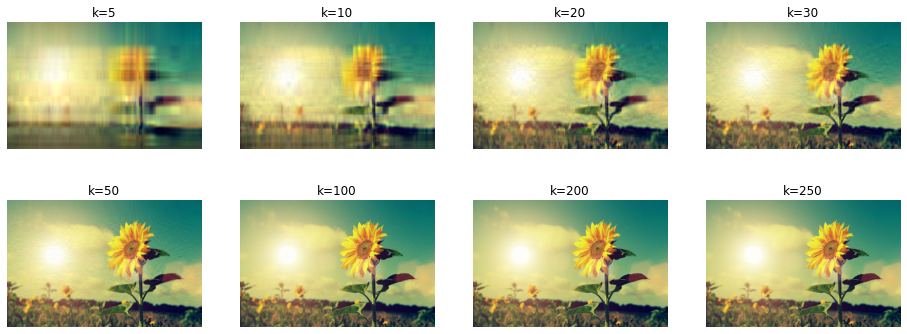

In [ ]:
import matplotlib.pyplot as plt
k_list = [5, 10, 20, 30, 50, 100, 200, 250]
fig = plt.figure(figsize=(16,6))
for i in range(8):
    _, im = compress_image(img_path, k_list[i])
    fig.add_subplot(2,4, i+1)
    plt.title('k={}'.format(k_list[i]))
    plt.axis('off')
    plt.imshow(im[...,::-1].astype(np.uint8))
plt.show()

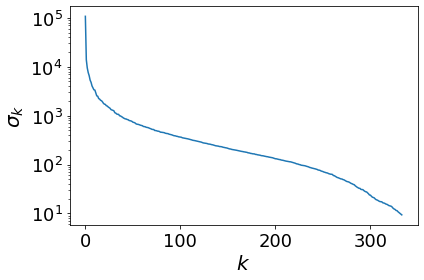

In [ ]:
import matplotlib.pyplot as plt
s, im = compress_image(img_path, 50)
plt.semilogy(s) 
plt.xlabel('$k$', fontsize = 20)
plt.ylabel('$\sigma_k$', fontsize = 20)
# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', labelsize=18)
plt.tight_layout()
plt.show()